In [1]:
import pandas as pd
import numpy as np

In [2]:
df_bad = pd.read_csv("../opencv/data/df_bad.csv", index_col=0) # set first column as index
df_good = pd.read_csv("../opencv/data/df_good.csv", index_col=0) # set first column as index

In [3]:
df_good["label"] = 0
df_bad["label"] = 1

In [4]:
df_bad.head(3)

,Width,Height,Eye2Box,Roll,Yaw,Pitch,label
1,94,124,0.846603,-2.589851,-2.215973,0.846031,1
2,96,123,0.846122,-2.837860,-0.927490,0.826792,1
3,92,121,0.817107,-2.599693,-2.786713,0.877005,1


In [5]:
df_good.head(3)

,Width,Height,Eye2Box,Roll,Yaw,Pitch,label
1,89,120,0.989072,-0.577896,-1.580688,0.638711,0
2,105,119,0.941441,-2.540039,-0.858757,0.614961,0
3,89,120,0.968118,-0.905693,-1.525284,0.666339,0


In [6]:
df = pd.concat([df_bad, df_good])
df.sample(4)

,Width,Height,Eye2Box,Roll,Yaw,Pitch,label
351,196,169,0.759776,-8.648436,-6.374176,0.939231,0
8,98,118,0.939395,-3.488968,0.082611,0.793215,0
322,198,242,1.164336,6.100739,-4.782440,1.206414,0
373,180,189,0.668995,-9.599659,-5.818787,1.284043,0


In [7]:
# df.to_csv("../opencv/data/df.csv")

In [8]:
df.corr()

,Width,Height,Eye2Box,Roll,Yaw,Pitch,label
Width,1.000000,0.844207,-0.004413,-0.544154,0.025867,0.413702,0.254726
Height,0.844207,1.000000,-0.007628,-0.301882,0.091593,0.437010,0.387298
Eye2Box,-0.004413,-0.007628,1.000000,0.003241,-0.092577,0.014275,-0.030104
Roll,-0.544154,-0.301882,0.003241,1.000000,0.011580,-0.292431,-0.135549
Yaw,0.025867,0.091593,-0.092577,0.011580,1.000000,0.049483,0.183638
Pitch,0.413702,0.437010,0.014275,-0.292431,0.049483,1.000000,0.393617
label,0.254726,0.387298,-0.030104,-0.135549,0.183638,0.393617,1.000000


In [9]:
list(df.columns)

['Width', 'Height', 'Eye2Box', 'Roll', 'Yaw', 'Pitch', 'label']

In [10]:
df.head(3)

,Width,Height,Eye2Box,Roll,Yaw,Pitch,label
1,94,124,0.846603,-2.589851,-2.215973,0.846031,1
2,96,123,0.846122,-2.837860,-0.927490,0.826792,1
3,92,121,0.817107,-2.599693,-2.786713,0.877005,1


### Random Forest

In [11]:
y = df["label"]
X = df.drop(['label'], axis = 1)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [13]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
model.score(X_test, y_test)

0.9447852760736196

In [19]:
from joblib import dump, load
MODEL_PATH = "../opencv/sk_random_forest/model.joblib"
dump(model, MODEL_PATH) 

['../opencv/sk_random_forest/model.joblib']

In [20]:
model_loaded = load(MODEL_PATH) 

In [21]:
y_predicted = model.predict(X_test)

In [22]:
y_predicted_loaded = model_loaded.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[81,  5],
       [ 4, 73]])

Text(69.0, 0.5, 'Truth')

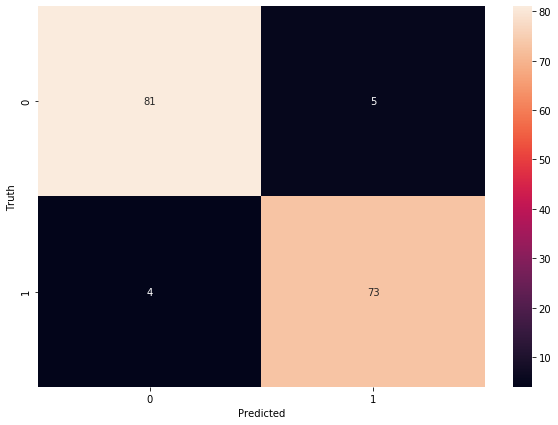

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


### Random Forest Hyperparameter Tuning 

In [14]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [16]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000]}


In [17]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   23.3s


In [ ]:
rf_random.best_params_